In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv("/content/Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [2]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [4]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
x=df.iloc[:,:-1]
x

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [6]:
y=df.iloc[:,-1]
y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

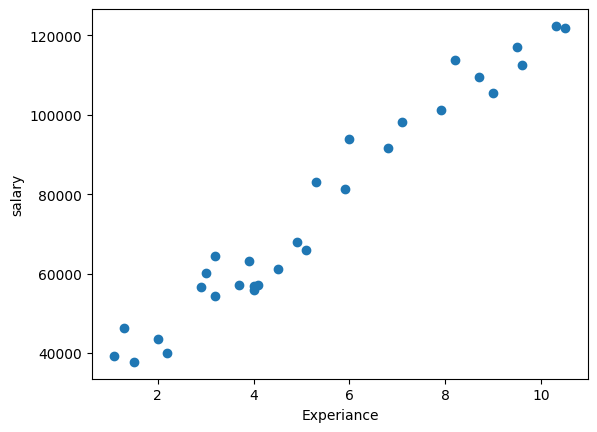

In [7]:
import matplotlib.pyplot as plt
plt.xlabel('Experiance')
plt.ylabel('salary')
plt.scatter(x,y)

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

,YearsExperience
0,1.1
4,2.2
16,5.1
5,2.9
13,4.1
11,4.0
22,7.9
1,1.3
2,1.5
25,9.0


In [9]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred


array([115573.62288352,  71679.93878159, 102498.90847018,  75415.57147111,
        55803.4998511 ,  60473.04071301, 122110.98009019, 107168.44933209,
        63274.76523015])

In [10]:
y_test

27    112635.0
15     67938.0
23    113812.0
17     83088.0
8      64445.0
9      57189.0
28    122391.0
24    109431.0
12     56957.0
Name: Salary, dtype: float64

In [11]:
print(model.predict([[4]]))

[63274.76523015]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


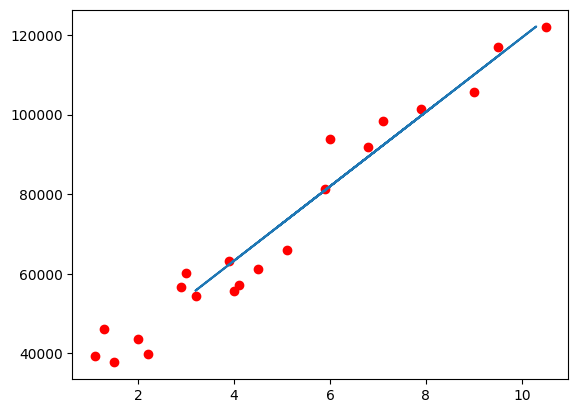

In [12]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_test,y_pred)

In [13]:
print('Slope is',model.coef_)

Slope is [9339.08172382]


In [14]:
print('intercept is ',model.intercept_)

intercept is  25918.438334893202


#create a data fram actual value and predict value

In [15]:
valu=pd.DataFrame({'actual value':y_test,'predict_value':y_pred})
valu

,actual value,predict_value
27,112635.0,115573.622884
15,67938.0,71679.938782
23,113812.0,102498.908470
17,83088.0,75415.571471
8,64445.0,55803.499851
9,57189.0,60473.040713
28,122391.0,122110.980090
24,109431.0,107168.449332
12,56957.0,63274.765230


#performance evaluation

In [16]:
from sklearn.metrics import mean_absolute_error
print('mean absolute error',mean_absolute_error(y_test,y_pred))

mean absolute error 5161.328710400183


In [17]:
#mean absolute percentage error
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error
print('mean absolute percentage',mean_absolute_percentage_error(y_test,y_pred))

mean absolute percentage 0.06647907533756252


In [18]:
#94 percentage acurate    100 -  mean absolute pre

In [19]:
#mean square error
print('mean absolute square error',mean_squared_error(y_test,y_pred))

mean absolute square error 37784662.46621314


In [20]:
#root mean squate
root=mean_squared_error(y_test,y_pred)
ans=np.sqrt((root))
ans

6146.92300799458

In [21]:
#r2 score cofficence of determination

from sklearn.metrics import r2_score
print('r2 score is ',r2_score(y_test,y_pred))

r2 score is  0.9414466227178214
